# Solve Quadratic Equation
<p> 1. The Problem with the solution w/ b = 1000 is that, when using Muller's method, the denominator is a miniscule number and so the accuracy is limited by the storage limit
of the computer. </p>

<p> 2. The difference is that the solutions are flipped, there should be a negative sign in the solutions according to Muller's equation </p>

In [71]:
import numpy as np

# Errors

def solve_quadratic(a, b, c):
    d = (b**2 - 4 * a * c)
    
    #Regular Quadratic Solution
    sol1 = float(-b - np.sqrt(d)) / float(2 * a)
    sol2 = (-b + np.sqrt(d)) / (2 * a)
    
    #Muller's Method
    sol3 = float(2 * c) / float(-b - np.sqrt(d))
    sol4 = (2 * c) / (-b + np.sqrt(d))
    return(sol1,sol2,sol3, sol4)



a = solve_quadratic(.001, 1000, .001)
print("Quadratic Sol1: %f" % a[0])
print("Quadratic Sol2: %f" % a[1])
print("Muller Sol1: %f" % a[2])
print("Muller Sol1: %f" % a[3])

Quadratic Sol1: -999999.999999
Quadratic Sol2: -0.000001
Muller Sol1: -0.000001
Muller Sol1: -1000010.575513


# Infinite Sum
<body> There is a clear problem here that I can't seem to get around. At some point the new terms added to the sum start having a larger numerator than denominator. This is clearly not a reality outside the computer, because as n--> inf, n! is larger than x^n, but in this case, the maximum bit length seems to be reached and x^n starts to grow faster than n! </body>

In [3]:
import numpy as np
from decimal import Decimal


def exp_sum(x):
    # Initialize Variables
    sum = 0
    n = 0
    flag = True

    while flag:
        # print(n)
        if (n % 2 == 0):
            new_num = (Decimal(x**n) / Decimal((np.math.factorial(n))))
            # print(abs(sum - new_num))
            if (abs(Decimal(sum) - new_num) == Decimal(sum)):
                return(sum, n)
            else:
                sum += new_num

        else:
            new_num2 = Decimal(x**n) / Decimal((np.math.factorial(n)))
            # print(abs(sum - new_num2))
            if (abs(Decimal(sum) - new_num) == Decimal(sum)):
                return(sum, n)
            else:
                sum -= new_num2
        n += 1


for x in [.1, 10, 100, 1000]:
    a = exp_sum(x)
    print("Sum is %f, number of terms are %f" % (a[0], a[1]))

Sum is 0.904837, number of terms are 16.000000
Sum is 0.000045, number of terms are 74.000000
Sum is 234254725697657.843750, number of terms are 298.000000
Sum is inf, number of terms are 1548.000000


# Bouncing Ball

<IPython.core.display.Javascript object>


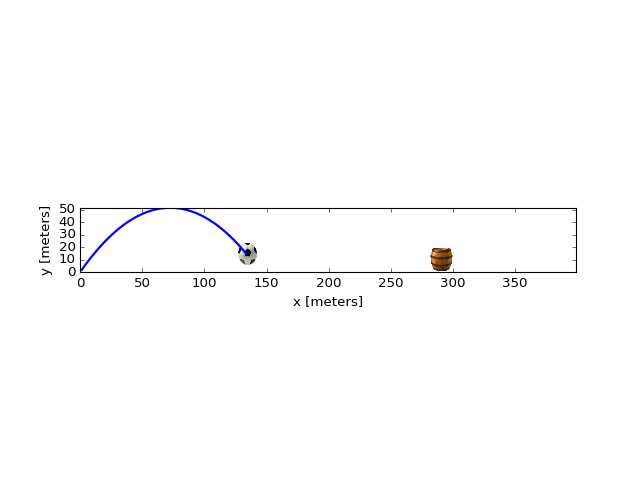

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt  # Plotting package
from matplotlib import animation
%matplotlib notebook
image = mpimg.imread("ballb.PNG")
image2 = mpimg.imread("barrel.PNG")
image3 = mpimg.imread("fire.PNG")
#Initial Conditions
#Velocity V= 5m/s  Angle Theta=25 degrees
xo=0.
yo=0.
Velocity = 55
angle = 55
dt=.04
Velocityx= Velocity*np.cos(angle*np.pi/180.)
Velocityy= Velocity*np.sin(angle*np.pi/180.)
xmax = 398.95
ymax = 51.72
x = np.zeros(700) ;
y = np.zeros(700) ;

jj=0
for j in range(0,700):
#x[j] = np.cos(j*2*np.pi/180);
#y[j] = np.sin(j*2*np.pi/180);
    jj=jj+1;
    time=jj*dt;
    x[j] = (xo+Velocityx*time);
    y[j] = (yo+Velocityy*time-9.81*(time)**2);
    if y[j] <0 :
        yo=0 ;
        xo=x[j-1] ;
        jj=1;
        time=jj*dt;
        Velocityy=Velocityy*.8 ;
        Velocityx=Velocityx*.8 ;
        x[j] = (xo+Velocityx*time);
        y[j] = (yo+Velocityy*time-9.81*(time)**2);
#        print(x[j]);
#        print(y[j]);
#        print(j);
#        print(xo);

        jj=0 ;
    
#print(y)
#values = np.arange(0,200)
#x = np.cos(values*np.pi/180);
#y = np.sin(values*np.pi/180);
#x = (xo+Velocityx*values*dt)/(Velocity*6) 
#y=  (yo+Velocityy*values*dt-9.81*(values*dt)**2)/Velocity
#y = (yo+Velocityy*values-9.81*values*values/2.)/(5*360)
#    print(x);
# Create an empty figure in which we will plot
fig, ax = plt.subplots()
ax.set_xlim(-.1, xmax)
ax.set_ylim(-.1, ymax)
plt.xlabel('x [meters]')
plt.ylabel('y [meters]')
ax.set_aspect('equal')  # Set the aspect ratio of the figure to be equal

# Initialize an empty plot.  Set the line characteristics here.
circle, = ax.plot([], [], color="b", lw=2)
dot,    = ax.plot([],[], color="r", marker="o")

# The animation routine requires an initialization routine, even though 
# it does the same thing as above.
def init():
    circle.set_data([], [])
    dot.set_data([], [])

# Function that updates the plot, showing the data from elements 0->n
def update(n):  # n = frame counter
    # Just for same measure, make sure that we don't try to plot data
    # outside of the data range, which has 360 points.
    i = n % 700
    if x[i] < 290:
        circle.set_data(x[:i], y[:i])
        plt.imshow(image, extent=[x[i]-15,x[i]+15,y[i]-15,y[i]+15])
        plt.imshow(image2, extent=[280,300,0,20])
    else:
        circle.set_data(x[:i], y[:i])
        plt.imshow(image, extent=[x[i]-15,x[i]+15,y[i]-15,y[i]+15])
        plt.imshow(image2, extent=[280,300,0,20])
        plt.imshow(image3, extent=[280,300,0,20])
        

    plt.show()

# Function to animate the figure.
# First argument: figure to update
# Second argument: function that updates the figure
# Other arguments: initialization function, # of frames to show, 
# whether to update the whole plot, and how many milliseconds between frames.
ani = animation.FuncAnimation(fig, update, init_func=init, frames=700, 
                              blit=False, interval=1)
plt.show()

In [13]:
plt.close()

# Simulating Gas Molecules Diffusing

<IPython.core.display.Javascript object>


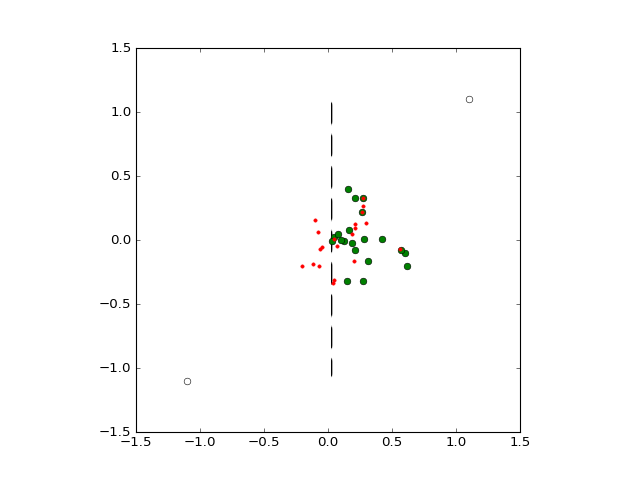

In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt  # Plotting package
from matplotlib import animation
#np.random.seed(19680801)
%matplotlib notebook
image = mpimg.imread("Dotted-line.png")
x=  np.zeros(shape=(42,400))
y=  np.zeros(shape=(42,400))
dx=.05
for j in range(0,42):
    x[j,0]=0
    y[j,0]=0
for j in range(1,400):
    x[40,j]=-1.1
    y[40,j]=-1.1
    x[41,j]=1.1
    y[41,j]=1.1
    for k in range (0,20): #This is for the green dots
        if (x[k,j-1] < .01):
            x[k,j]=x[k,j - 1] + abs(abs(x[k,j - 1]) - .1)
        else:
            x[k,j] = x[k,j-1]+dx*(1-2*np.random.random());
            y[k,j] = y[k,j-1]+dx*(1-2*np.random.random());
    for k in range (20,39): #This is for the red dots
        x[k,j] = x[k,j-1]+dx*(1-2*np.random.random());
        y[k,j] = y[k,j-1]+dx*(1-2*np.random.random());
#print(x)
# Create an empty figure in which we will plot
fig, ax = plt.subplots()
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
plt.xlabel('x')
plt.ylabel('y')
ax.set_aspect('equal')  # Set the aspect ratio of the figure to be equal

# Initialize an empty plot.  Set the line characteristics here.
#circle, = ax.plot([], [], color="b", lw=2)

dot,    = ax.plot([],[], color="r", marker="o")

# The animation routine requires an initialization routine, even though 
# it does the same thing as above.
def init():
#    circle.set_data([], [])
     dot.set_data([], [])

# Function that updates the plot, showing the data from elements 0->n
def update(n):  # n = frame counter
    # Just for same measure, make sure that we don't try to plot data
    # outside of the data range, which has 360 points.

    i = n % 400
    ax.clear()
    ax.plot(x[40,i],y[40,i], color="w", marker="o")  #this is to keep axes from moving
    ax.plot(x[41,i],y[41,i], color="w", marker="o")
    plt.imshow(image, extent=[-.25,.3,-1.1,1.1])

    for k in range (0,20):
#    dot.set_data(x[0,i],y[0,i])
        ax.plot(x[k,i],y[k,i], color="g", marker="o")
    for k in range (19,39):
        ax.plot(x[k,i],y[k,i], color="r", marker=".")

#   dot.set_data(x[1,i],y[1,i])
#    dot.set_data(x[2,i],y[2,i])

#plt.imshow(image, extent=[x[i]-.05,x[i]+.05,y[i]-.05,y[i]+.05])
#    plt.imshow(image2, extent=[.9,1.,0,.1])

    plt.show()

# Function to animate the figure.
# First argument: figure to update
# Second argument: function that updates the figure
# Other arguments: initialization function, # of frames to show, 
# whether to update the whole plot, and how many milliseconds between frames.
ani = animation.FuncAnimation(fig, update, init_func=init, frames=400, 
                              blit=False, interval=20)
plt.show()

In [8]:
plt.close()

# Pendulum

<IPython.core.display.Javascript object>


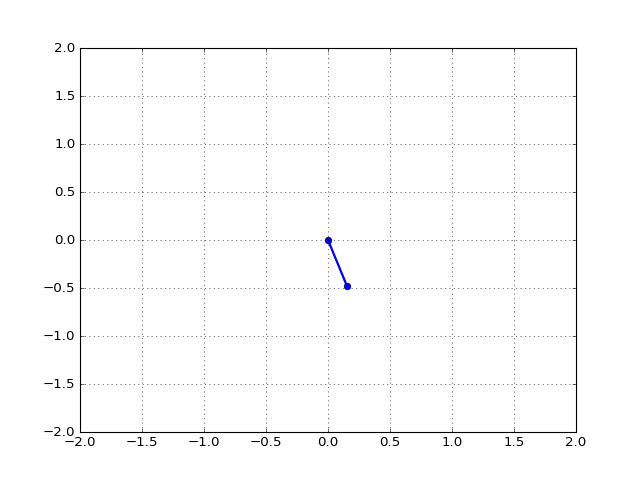

In [15]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

g = 9.81  # acceleration due to gravity, in m/s^2
L = .5  # Length of pendula

theta_0 = - np.pi / 8
dt = .01
t = np.arange(0.0, 20, dt)
w = np.sqrt(float(g) / float(L))

# Small Angle Approximations (Because it is small angles
# you cannot use large angles or it'll seem weird, duh)

theta = theta_0 * np.cos(w * t)
x = L * sin(theta)
y = -1 * L * cos(theta)
#length = [np.sqrt(i**2 + j**2) for i in x for j in y]
#print(x[900], y[900], np.sqrt(x[900]**2 + y[900]**2))

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)


def init():
    line.set_data([], [])
    return(line)


def run(i):
    thisx = [0, x[i]]
    thisy = [0, y[i]]

    line.set_data(thisx, thisy)
 

ani = animation.FuncAnimation(fig, run, np.arange(1, len(y)),
                              interval=25, blit=False, init_func=init)

plt.show()